In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
# Hyper-parameters 
num_epochs = 5
batch_size = 4
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


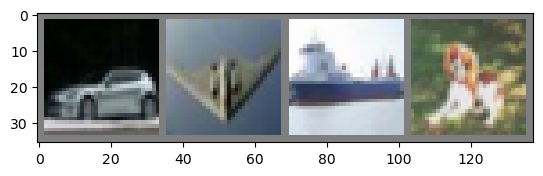

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))


In [6]:
conv1 = nn.Conv2d(3, 6, 5)      # input image channels, output channels, kernel size (filter)
pool = nn.MaxPool2d(2, 2)       # kernel size, stride
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)

torch.Size([4, 3, 32, 32])


In [7]:
x = conv1(images)
print(x.shape)

torch.Size([4, 6, 28, 28])


It was at first, the size of the image, 32x32. And above it can be seen that was downsized to 28x28. This is the formula for computing the output size of the convolved image.

(Width - Filter + 2*Padding)/Stride + 1 

(32 - 5 + 2*0)/1 + 1 = 28

In [8]:
x = pool(x)
print(x.shape)

torch.Size([4, 6, 14, 14])


The kernel size of 2 and stride of 2 make the image size reduce in a factor of 2. That is why above size is half of the previous to it. 

In [9]:
x = conv2(x)
print(x.shape)

torch.Size([4, 16, 10, 10])


Above, follows the same formula as described before. This is the formula:

(Width - Filter + 2*Padding)/Stride + 1 

(14 - 5 + 2*0)/1 + 1 = 10

# Making use of F.relu()

In [10]:
conv1 = nn.Conv2d(3, 6, 5)      # input image channels, output channels, kernel size (filter)
pool = nn.MaxPool2d(2, 2)       # kernel size, stride
conv2 = nn.Conv2d(6, 16, 5)
print(images.shape)

torch.Size([4, 3, 32, 32])


In [11]:
x = pool(F.relu(conv1(images)))
print(x.shape)

torch.Size([4, 6, 14, 14])


In [12]:
x = pool(F.relu(conv2(x)))
print(x.shape)

torch.Size([4, 16, 5, 5])


These operations shown above have the same effect as the ones previous to it. Meaning that we can use:

"pool(F.relu(conv1(...)))" or

" x = conv1(...)

x = pool(x)" 



# Another test


In [13]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)
dataiter = iter(data_loader)
images, labels = next(dataiter)

print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [14]:
conv1 = nn.Conv2d(1, 16, 3, stride=2, padding=1)      # input image channels, output channels, kernel size (filter)
conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
conv3 = nn.Conv2d(32, 64, 7)
print(images.shape)

torch.Size([64, 1, 28, 28])


In [15]:
x = F.relu(conv1(images))
print(x.shape)

torch.Size([64, 16, 14, 14])


In [16]:
x = F.relu(conv2(x))
print(x.shape)

torch.Size([64, 32, 7, 7])


In [17]:
x = F.relu(conv3(x))
print(x.shape)

torch.Size([64, 64, 1, 1])


In [18]:
conv4 = nn.ConvTranspose2d(64, 32, 7)      # input image channels, output channels, kernel size (filter)
conv5 = nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1)
conv6 = nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1)
print(x.shape)

torch.Size([64, 64, 1, 1])


In [19]:
x = F.relu(conv4(x))
print(x.shape)

torch.Size([64, 32, 7, 7])


In [20]:
x = F.relu(conv5(x))
print(x.shape)

torch.Size([64, 16, 14, 14])
